In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#libraries for feature extraction
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import learning_curve

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
xtr = np.loadtxt("/content/drive/MyDrive/Assignment_2_ML/TrainData.csv")
ytr = np.loadtxt("/content/drive/MyDrive/Assignment_2_ML/TrainLabels.csv")
xts = np.loadtxt("/content/drive/MyDrive/Assignment_2_ML/TestData.csv")

# Visualizing data

-1.0


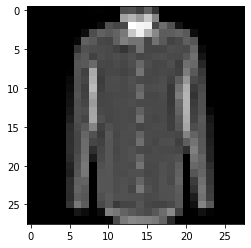

In [31]:
z=21
print(ytr[z])
plt.imshow(xtr[z].reshape([28,28]),cmap='gray')

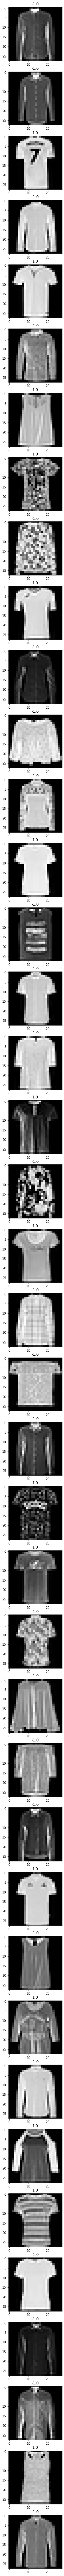

In [ ]:
i=range(20,60)
f , ax = plt.subplots(len(i),1,figsize=(10,5))
f.set_figheight(150)
f.set_figwidth(25)
j=0
for x in i:    
  ax[j].imshow(xtr[x].reshape([28,28]),cmap='gray')
  ax[j].set_title(ytr[x])
  j+=1

Logistic regression over xtr

In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000)
kf = KFold(n_splits=5)
for train, test in kf.split(xtr,ytr):
    lr_model.fit(xtr[train],ytr[train])
    yptr=lr_model.predict(xtr[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

# Feature Extraction using HOGs and dimensionality reduction with PCA

In [45]:
def extract_feat(x):
  print('Calculating HOGs')
  print(len(x))
  numpyarray = np.empty((len(x), 8192))
  for i in range(0,len(x)):
    img=np.reshape(x[i],(28,28))
    resized_img = resize(img, (128, 64))
    fd, hog_image = hog(resized_img, orientations=10, pixels_per_cell=(8, 8),cells_per_block=(4, 4), visualize=True)
    in_img=hog_image.reshape(128*64)
    numpyarray[i, :]=in_img
    if (i%500==0):
      print(i)
  #standerize the extracted features
  print('standerizing the HOGs')
  sc = StandardScaler()
  sc.fit(numpyarray)
  X_train_std = sc.transform(numpyarray)
  #PCA on the standerized output to reduce dimensions
  print('Applying PCA')
  pca = PCA(750)
  X_train_pca = pca.fit_transform(X_train_std)
  return (X_train_pca)

In [46]:
X_train_pca=extract_feat(xtr)

Calculating HOGs
12000
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
standerizing the HOGs
Applying PCA


Implementation of the classification techniques on the images with reduced dimensionality with and without penalty

## Logistic Regression 

In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000,penalty='none')
kf = KFold(n_splits=8)
for train, test in kf.split(X_train_pca,ytr):
    lr_model.fit(X_train_pca[train],ytr[train])
    yptr=lr_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

[0.8573333333333333, 0.8506666666666667, 0.8526666666666667, 0.852, 0.8673333333333333, 0.7346666666666667, 0.6893333333333334, 0.696]
Accuracy: 0.800 (0.073)


In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000,C=1e-10)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    lr_model.fit(X_train_pca[train],ytr[train])
    yptr=lr_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

[0.8179166666666666, 0.8333333333333334, 0.82, 0.70625, 0.6795833333333333]
Accuracy: 0.771 (0.065)


In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    lr_model.fit(X_train_pca[train],ytr[train])
    yptr=lr_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

[0.8583333333333333, 0.8475, 0.8479166666666667, 0.7316666666666667, 0.6929166666666666]
Accuracy: 0.796 (0.069)


In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000,C=10)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    lr_model.fit(X_train_pca[train],ytr[train])
    yptr=lr_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

[0.8579166666666667, 0.8470833333333333, 0.8475, 0.7316666666666667, 0.6929166666666666]
Accuracy: 0.795 (0.069)


In [ ]:
Acc=[]
lr_model = LogisticRegression(max_iter=12000,C=50)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    lr_model.fit(X_train_pca[train],ytr[train])
    yptr=lr_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc.append(acc)
print(Acc)
print('Accuracy: %.3f (%.3f)' % (mean(Acc), std(Acc)))

[0.8583333333333333, 0.8475, 0.8475, 0.7316666666666667, 0.6929166666666666]
Accuracy: 0.796 (0.069)


## SVM Models

In [ ]:
Acc_svm=[]
svm_model = svm.SVC()
kf = KFold(n_splits=8)
for train, test in kf.split(X_train_pca,ytr):
    svm_model.fit(X_train_pca[train],ytr[train])
    yptr=svm_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc_svm.append(acc)
print(Acc_svm)
print('Accuracy: %.3f (%.3f)' % (mean(Acc_svm), std(Acc_svm)))

[0.8953333333333333, 0.8693333333333333, 0.882, 0.8833333333333333, 0.8846666666666667, 0.7566666666666667, 0.704, 0.7073333333333334]
Accuracy: 0.823 (0.079)


In [ ]:
Acc_svm=[]
svm_model = svm.SVC(C=1e-10,)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    svm_model.fit(X_train_pca[train],ytr[train])
    yptr=svm_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc_svm.append(acc)
print(Acc_svm)
print('Accuracy: %.3f (%.3f)' % (mean(Acc_svm), std(Acc_svm)))

[0.5070833333333333, 0.5045833333333334, 0.5008333333333334, 0.5016666666666667, 0.5020833333333333]
Accuracy: 0.503 (0.002)


In [32]:
Acc_svm=[]
svm_model = svm.SVC(C=10,)
kf = KFold(n_splits=5)
for train, test in kf.split(X_train_pca,ytr):
    svm_model.fit(X_train_pca[train],ytr[train])
    yptr=svm_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc_svm.append(acc)
print(Acc_svm)
print('Accuracy: %.3f (%.3f)' % (mean(Acc_svm), std(Acc_svm)))

[0.8775, 0.8675, 0.8779166666666667, 0.7420833333333333, 0.7104166666666667]
Accuracy: 0.815 (0.073)


## Learning Curves

In [33]:
from sklearn.model_selection import learning_curve

Mean training scores

 1028     1.000000
3342     1.000000
5656     0.933825
7970     0.884280
10285    0.841517
dtype: float64

 --------------------

Mean validation scores

 1028     0.777994
3342     0.751242
5656     0.787158
7970     0.795908
10285    0.798824
dtype: float64


(0.6, 1.2)

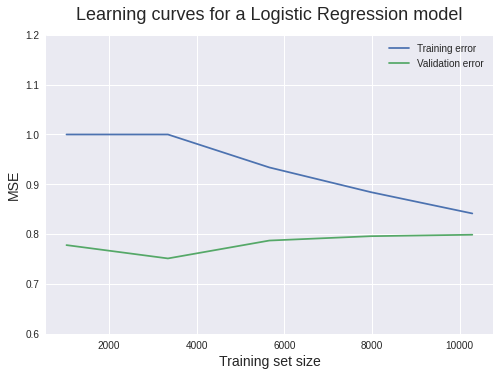

In [35]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='none'),X = X_train_pca,y = ytr,  cv = 7,scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

Mean training scores

 1000     1.000000
3250     0.998154
5500     0.935879
7750     0.884108
10000    0.842450
dtype: float64

 --------------------

Mean validation scores

 1000     0.772167
3250     0.754833
5500     0.786083
7750     0.796167
10000    0.799917
dtype: float64


(0.6, 1.2)

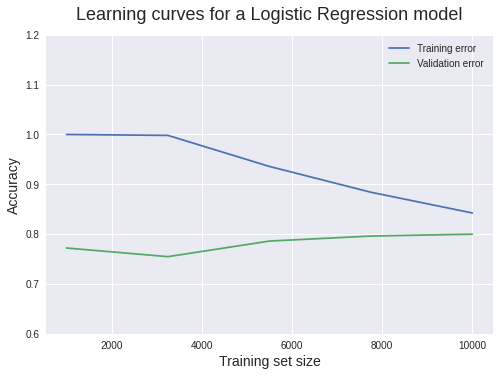

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l2',C=10),X = X_train_pca,y = ytr,  cv = 6,scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

Mean training scores

 960     1.000000
3120    0.986154
5280    0.937159
7440    0.884919
9600    0.843125
dtype: float64

 --------------------

Mean validation scores

 960     0.773750
3120    0.762333
5280    0.785250
7440    0.794000
9600    0.795167
dtype: float64


(0.6, 1.2)

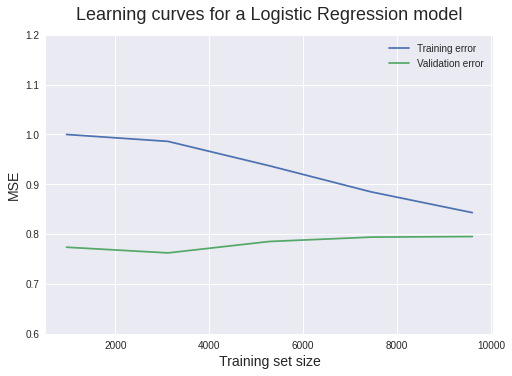

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l2'),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

Mean training scores

 960     1.000000
3120    0.976218
5280    0.935303
7440    0.885134
9600    0.843417
dtype: float64

 --------------------

Mean validation scores

 960     0.768667
3120    0.770750
5280    0.788917
7440    0.794333
9600    0.796000
dtype: float64


(0.6, 1.2)

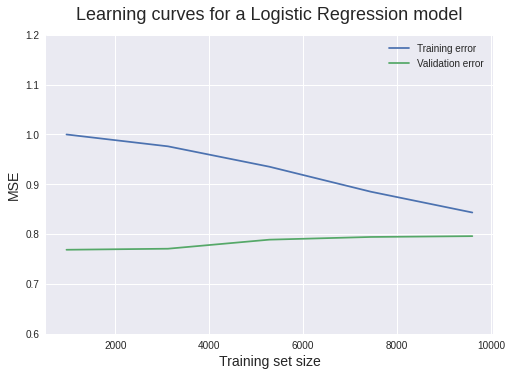

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l1',solver='liblinear'),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

Mean training scores

 960     1.000000
3120    0.999936
5280    0.937197
7440    0.884812
9600    0.843125
dtype: float64

 --------------------

Mean validation scores

 960     0.764417
3120    0.750750
5280    0.784750
7440    0.794000
9600    0.795083
dtype: float64


(0.6, 1.2)

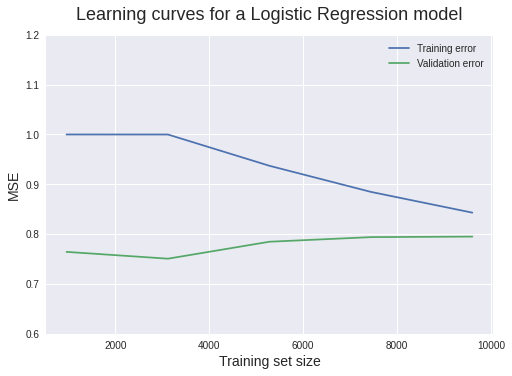

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l1',solver='liblinear',C=10),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mean training scores

 960     1.000000
3120    0.976218
5280    0.935303
7440    0.885134
9600    0.843417
dtype: float64

 --------------------

Mean validation scores

 960     0.768917
3120    0.770750
5280    0.788917
7440    0.794333
9600    0.796000
dtype: float64


(0.6, 1.2)

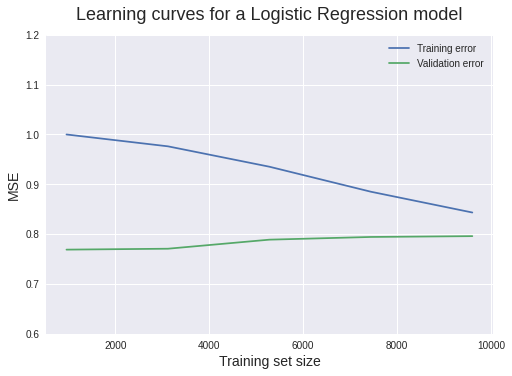

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l1',solver='liblinear',C=1.0),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy',n_jobs=-1)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

Mean training scores

 960     1.000000
3120    1.000000
5280    0.937008
7440    0.884812
9600    0.843146
dtype: float64

 --------------------

Mean validation scores

 960     0.761750
3120    0.750583
5280    0.784417
7440    0.794000
9600    0.795167
dtype: float64


(0.6, 1.2)

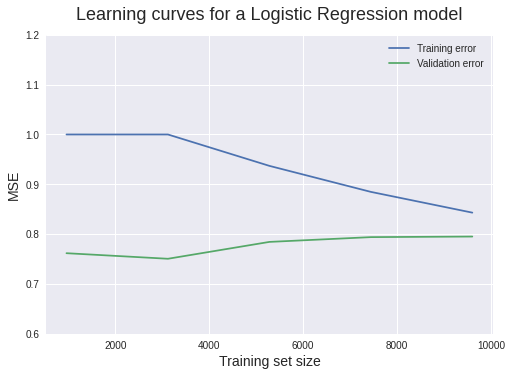

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = LogisticRegression(max_iter=12000,penalty='l1',solver='liblinear',C=20.0),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy',n_jobs=-1)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Logistic Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mean training scores

 960     0.960833
3120    0.955962
5280    0.957424
7440    0.933710
9600    0.905438
dtype: float64

 --------------------

Mean validation scores

 960     0.789583
3120    0.812833
5280    0.818667
7440    0.821583
9600    0.821833
dtype: float64


(0.6, 1.2)

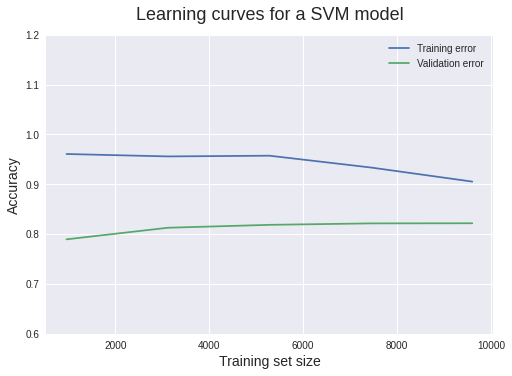

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = svm.SVC(),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy',n_jobs=-1)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = svm.SVC(C=1e-10),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy',n_jobs=-1)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.3,0.9)

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = svm.SVC(C=5),X = X_train_pca,y = ytr,  cv = 5,scoring = 'accuracy',n_jobs=-1)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.2)

# Predictions using the best performing model

In [48]:
X_test_pca=extract_feat(xts)

Calculating HOGs
2000
0
500
1000
1500
standerizing the HOGs
Applying PCA


In [49]:
X_test_pca.shape

(2000, 750)

In [47]:
Acc_svm=[]
my_model = svm.SVC()
kf = KFold(n_splits=8)
for train, test in kf.split(X_train_pca,ytr):
    my_model.fit(X_train_pca[train],ytr[train])
    yptr=my_model.predict(X_train_pca[test])
    acc= accuracy_score(ytr[test], yptr)
    Acc_svm.append(acc)
print(Acc_svm)
print('Accuracy: %.3f (%.3f)' % (mean(Acc_svm), std(Acc_svm)))

[0.896, 0.8706666666666667, 0.8826666666666667, 0.8826666666666667, 0.8826666666666667, 0.7586666666666667, 0.7026666666666667, 0.706]
Accuracy: 0.823 (0.080)


In [50]:
yts=my_model.predict(X_test_pca)
np.savetxt("I202219_Predictions.csv", yts)
from google.colab import files
files.download('I202219_Predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
yts

array([-1., -1., -1., ...,  1.,  1., -1.])

In [58]:
from joblib import dump
dump(my_model, 'myModel1.pkl')
files.download('myModel1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>